In [1]:
import numpy as np

In [2]:
from sklearn.neighbors import NearestCentroid

In [27]:
def LDA_QR(X,y):
    clf = NearestCentroid()
    clf.fit(X, y)
    centroids = clf.centroids_
    class_centroid = X.mean(axis=0)
    N = X.shape[0]
    N_class = {}
    y  = y.astype(int)
    
    for i in range(X.shape[0]):
        if y[i] in N_class:
            N_class[y[i]]+=1
        else:
            N_class[y[i]]=1

    H_b = np.zeros((len(N_class),X.shape[1]))

    for i in range(len(N_class)):
        H_b[i] = np.sqrt(N_class[i])*(centroids[i]-class_centroid)
    H_b = H_b/np.sqrt(N)
    Q,R = np.linalg.qr(H_b.T)
    
    sub_class = {}
    for idx in range(X.shape[0]):
        
        if y[idx] in sub_class:
            sub_class[y[idx]] = np.vstack((sub_class[y[idx]],X[idx]))
        else:
             sub_class[y[idx]] = np.asarray(X[idx])
    
    
    H_w = sub_class[np.unique(y)[0]] - centroids[0]
    
    for i in range(1,len(np.unique(y))):
        tmp_sub_class = sub_class[np.unique(y)[i]] - centroids[i]
        H_w = np.vstack((H_w, tmp_sub_class))
    H_w = H_w/np.sqrt(N)
    
    Z = H_w@Q
    S_b = R@R.T
    S_w = Z.T@Z
    w,v=np.linalg.eig(np.linalg.inv(S_w)@S_b)
    idx = np.argsort(-w)

    w = w[idx]
    v = v[:,idx]
    
    G = Q@v
    X_l = X@G
    
    return X_l
    

In [28]:
def pre_lda_qr(X,y):
    clf = NearestCentroid()
    clf.fit(X, y)
    centroids = clf.centroids_
    class_centroid = X.mean(axis=0)
    N = X.shape[0]
    N_class = {}
    
    y  = y.astype(int)
    for i in range(X.shape[0]):
        
        if int(y[i]) in N_class:
            N_class[y[i]]+=1
        else:
            N_class[y[i]]=1
    
    
    H_b = np.zeros((len(N_class),X.shape[1]))
   

    for i in range(len(N_class)):
        H_b[i] = np.sqrt(N_class[i])*(centroids[i]-class_centroid)
        
    H_b = H_b/np.sqrt(N)
    
    Q,R = np.linalg.qr(H_b.T)
    G = Q
    X_l = X@G
    return X_l

In [29]:
TESTING

NameError: name 'TESTING' is not defined

In [30]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
from matplotlib import pyplot as plt

In [32]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [33]:
X.shape

(1797, 64)

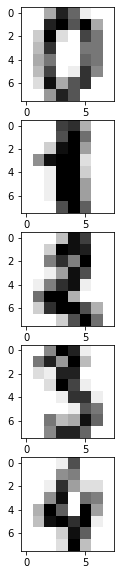

In [34]:
f, axs = plt.subplots(5,figsize=(10,10))
for i in range(5):
#     plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    
    axs[i].imshow(X[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
#     plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [35]:
y[1]

1

In [36]:
X_l = pre_lda_qr(X,y)
X_l_full = LDA_QR(X,y)

In [15]:
X_l_full_show = X_l_full[:,:2]

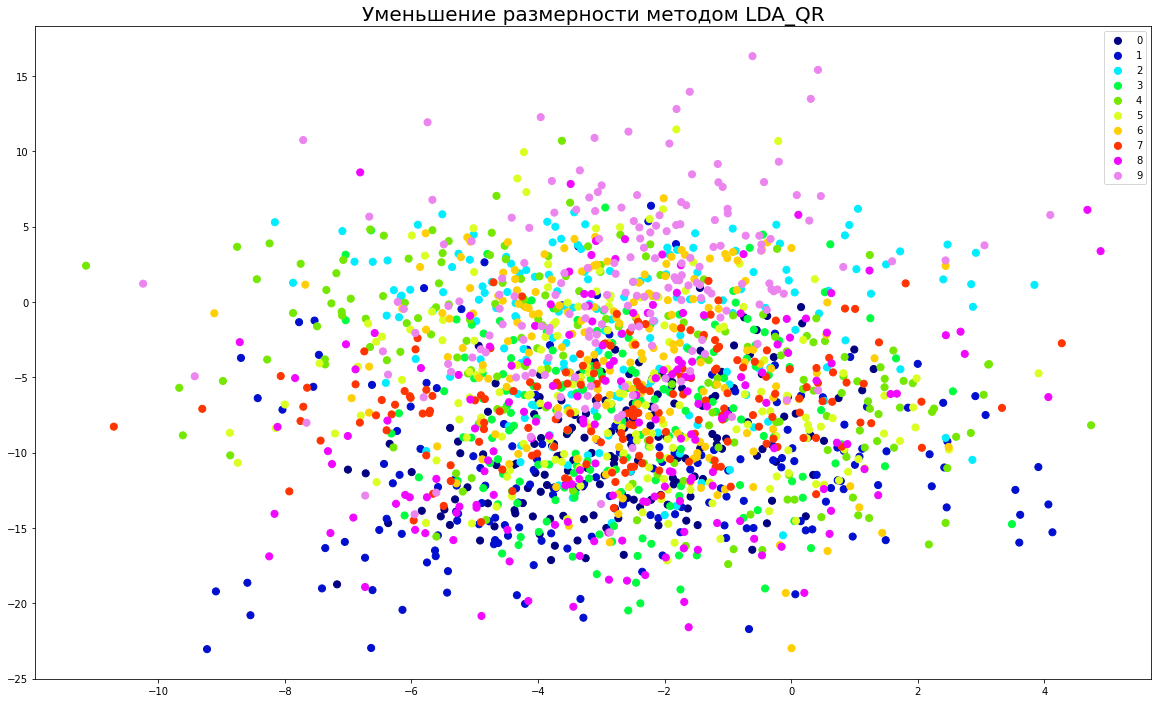

In [16]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_l_full_show[:, 0][y == d],
                X_l_full_show[:, 1][y == d],
                c=[color] * len(X_l_full_show[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом LDA_QR", fontsize=20)
plt.legend()

In [17]:
X_l_show = X_l[:, :2]

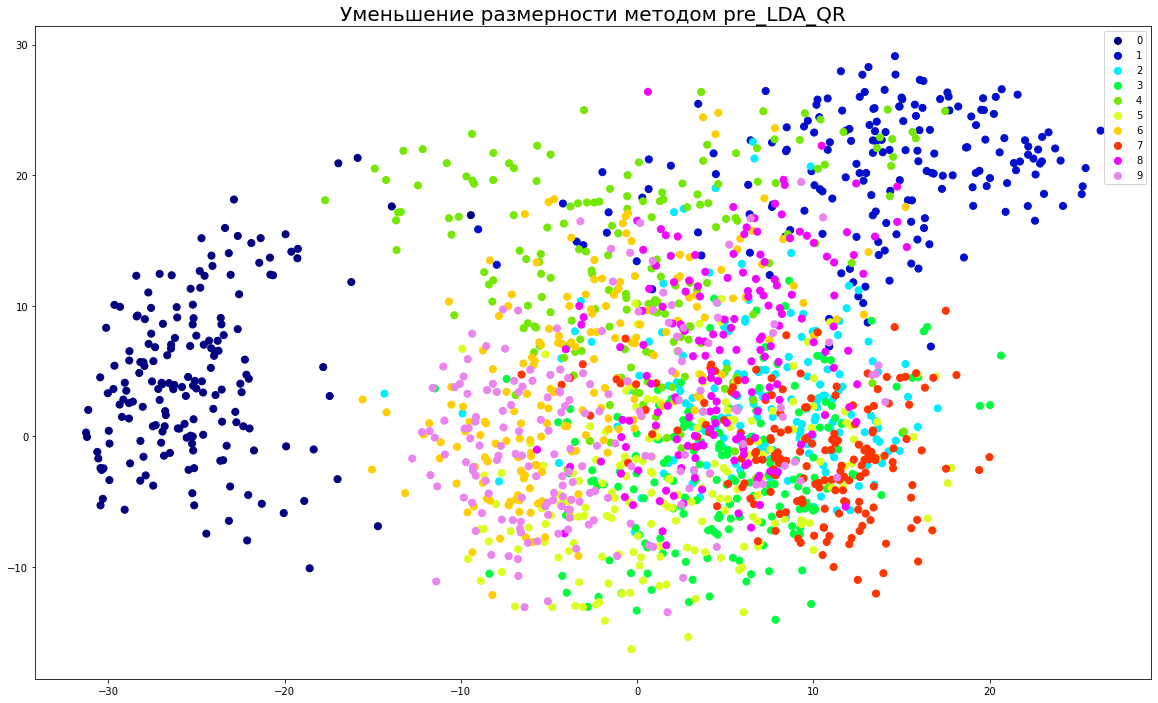

In [18]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_l_show[:, 0][y == d],
                X_l_show[:, 1][y == d],
                c=[color] * len(X_l_show[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом pre_LDA_QR", fontsize=20)
plt.legend()

In [19]:
#PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit(X).transform(X)
X_pca_2

array([[ -1.25946669,  21.27488407],
       [  7.95761163, -20.76869899],
       [  6.99192304,  -9.95598694],
       ...,
       [ 10.80128324,  -6.96025165],
       [ -4.87209914,  12.42395283],
       [ -0.34439035,   6.36554967]])

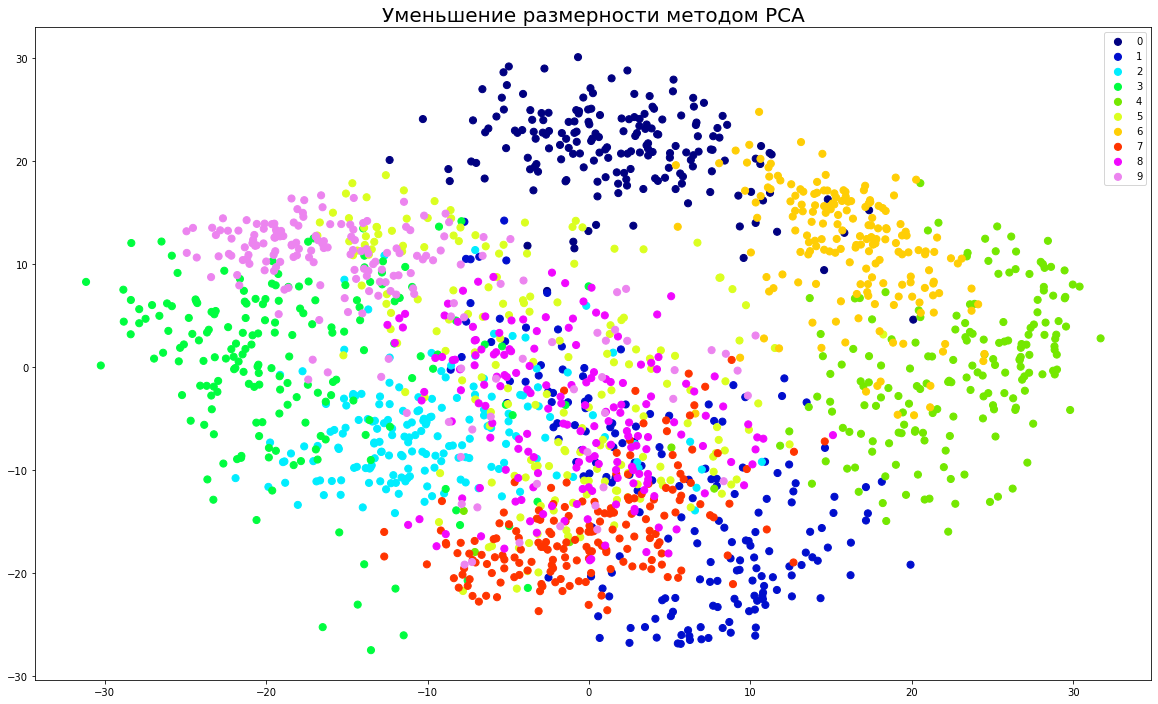

In [21]:
plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цветов
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                c=[color] * len(X_pca_2[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

In [22]:
#SVD

In [23]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)

X_svd_2 = svd.fit_transform(X)
X_svd_2

array([[45.86127719, -1.19208688],
       [55.52967927,  7.86180483],
       [55.8278837 ,  6.91455217],
       ...,
       [65.52698526, 10.65880776],
       [58.60616587, -4.91115368],
       [64.44823101, -0.45548343]])

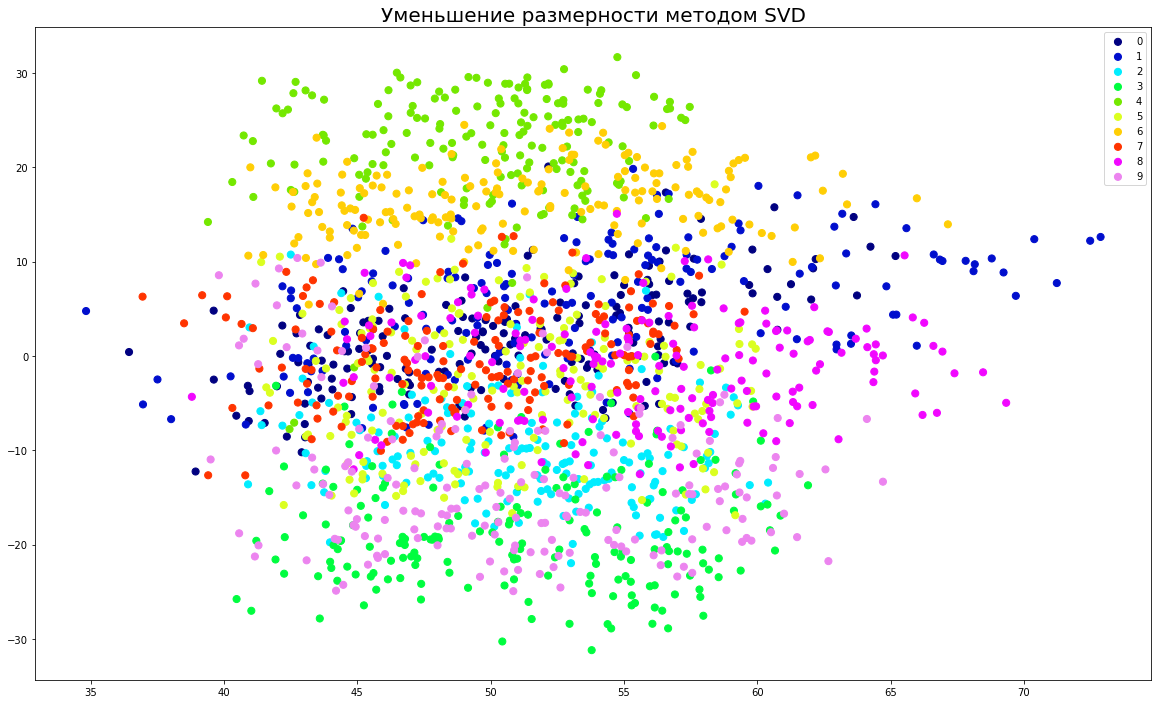

In [24]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_svd_2[:, 0][y == d],
                X_svd_2[:, 1][y == d],
                c=[color] * len(X_svd_2[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом SVD", fontsize=20)
plt.legend()

In [25]:
pre_lda_score = []
lda_qr_score = []
PCA_score = []
SVD_score = []

In [26]:
for i in range(1,X_l.shape[1]+1):
    
    pca = PCA(n_components=i)
    X_pca = pca.fit(X).transform(X)
    PCA_score.append(cross_val_score(LogisticRegression(),X_pca, y, scoring='accuracy').mean())
    
    svd = TruncatedSVD(n_components=i)
    X_svd = svd.fit_transform(X)
    SVD_score.append(cross_val_score(LogisticRegression(),X_svd, y, scoring='accuracy').mean())

    
    pre_lda_score.append(cross_val_score(LogisticRegression(),X_l[:,:i], y, scoring='accuracy').mean())
    lda_qr_score.append(cross_val_score(LogisticRegression(),X_l_full[:,:i], y, scoring='accuracy').mean())

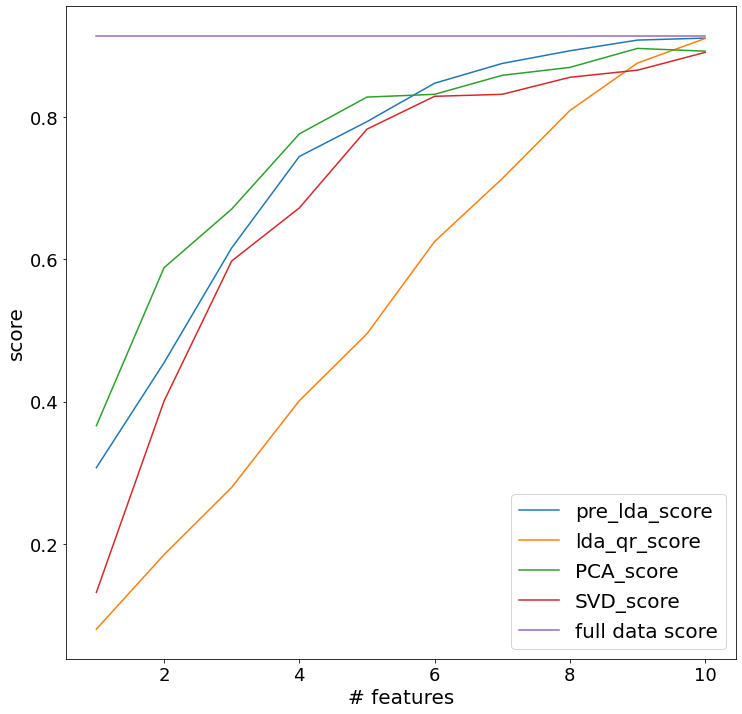

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 12))

const = cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()
const = [const]*X_l.shape[1]


plt.plot(np.arange(1,11), pre_lda_score, label="pre_lda_score")
plt.plot(np.arange(1,11), lda_qr_score, label="lda_qr_score")
plt.plot(np.arange(1,11), PCA_score, label="PCA_score")
plt.plot(np.arange(1,11), SVD_score, label="SVD_score")
plt.plot(np.arange(1,11), const, label="full data score")
plt.legend(fontsize=20)
plt.xlabel("# features", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.show()

In [28]:
pre_lda_time = []
lda_qr_time = []
PCA_time = []
SVD_time = []

In [29]:
clf = LogisticRegression()
for i in range(1,X_l.shape[1]+1):
    t =  %timeit -o -q -r 1 clf.fit(X_l[:,:i], y)
    pre_lda_time.append(t.best)

In [30]:
for i in range(1,X_l.shape[1]+1):
    t =  %timeit -o -q -r 1 clf.fit(X_l_full[:,:i], y)
    lda_qr_time.append(t.best)

In [31]:
for i in range(1,X_l.shape[1]+1):
    pca = PCA(n_components=i)
    X_pca = pca.fit(X).transform(X)
    
    t =  %timeit -o -q -r 1 clf.fit(X_pca, y)
    PCA_time.append(t.best)

In [32]:
for i in range(1,X_l.shape[1]+1):
    svd = TruncatedSVD(n_components=i)
    X_svd = svd.fit_transform(X)
    
    t =  %timeit -o -q -r 1 clf.fit(X_svd, y)
    SVD_time.append(t.best)

In [33]:
clf = LogisticRegression()
t =  %timeit -o -q -r 1 clf.fit(X, y)
const = [t.best]*X_l.shape[1]

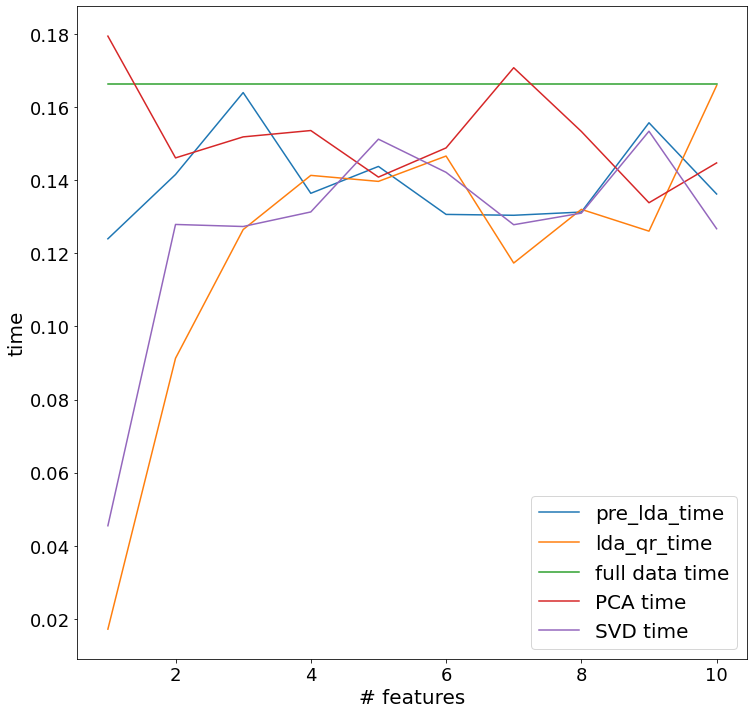

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 12))


plt.plot(np.arange(1,11), pre_lda_time, label="pre_lda_time")
plt.plot(np.arange(1,11), lda_qr_time, label="lda_qr_time")
plt.plot(np.arange(1,11), const, label="full data time")
plt.plot(np.arange(1,11), PCA_time, label="PCA time")
plt.plot(np.arange(1,11), SVD_time, label="SVD time")



plt.legend(fontsize=20)
plt.xlabel("# features", fontsize=20)
plt.ylabel("time", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.show()

In [38]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)

X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [39]:
X.shape

(2370, 11750)

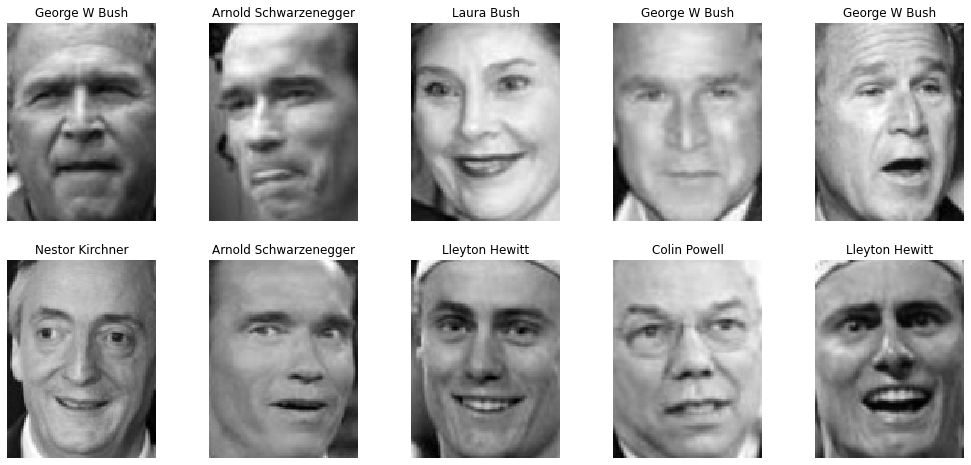

In [40]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [41]:
X_l = pre_lda_qr(X,y)
X_l_full = LDA_QR(X,y)
X_l.shape

(2370, 34)

In [38]:
X_l_full_show = X_l_full[:,:2]

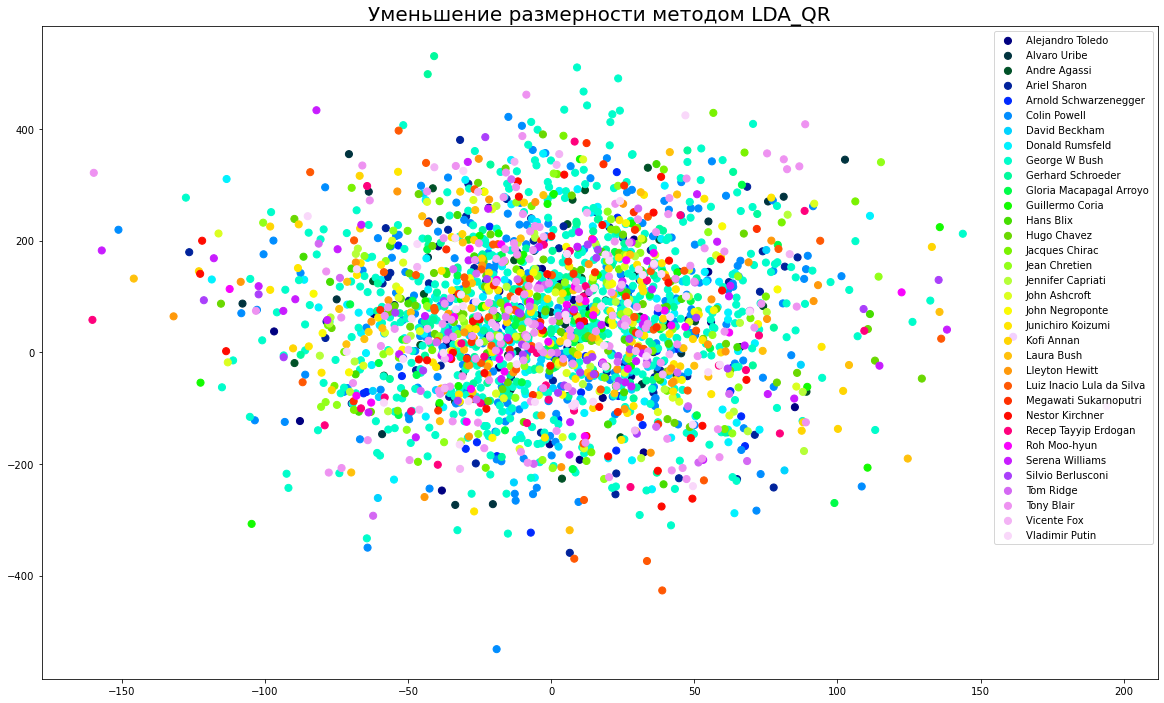

In [39]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(34): # перебираем цифру
    norm = Normalize(vmin=0, vmax=34) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_l_full_show[:, 0][y == d],
                X_l_full_show[:, 1][y == d],
                c=[color] * len(X_l_full_show[:, 0][y == d]), label=names[d], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом LDA_QR", fontsize=20)
plt.legend()

In [40]:
X_l_show = X_l[:, :2]

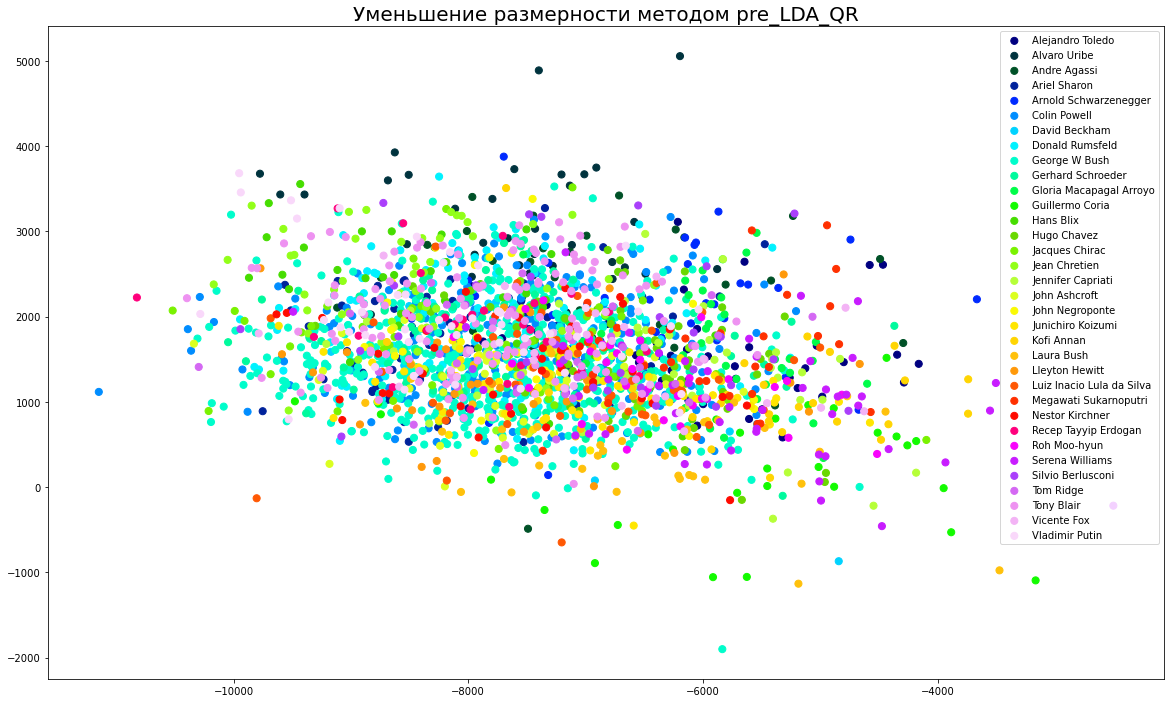

In [41]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(34): # перебираем цифру
    norm = Normalize(vmin=0, vmax=34) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_l_show[:, 0][y == d],
                X_l_show[:, 1][y == d],
                c=[color] * len(X_l_show[:, 0][y == d]), label=names[d], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом pre_LDA_QR", fontsize=20)
plt.legend()

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit(X).transform(X)
X_pca_2

array([[ 2523.1345   ,  1490.5615   ],
       [ 1973.147    ,  1064.6787   ],
       [-2402.039    , -2600.6526   ],
       ...,
       [    4.2972107,   455.341    ],
       [   45.458424 ,  3124.6958   ],
       [-1250.735    ,  -555.97327  ]], dtype=float32)

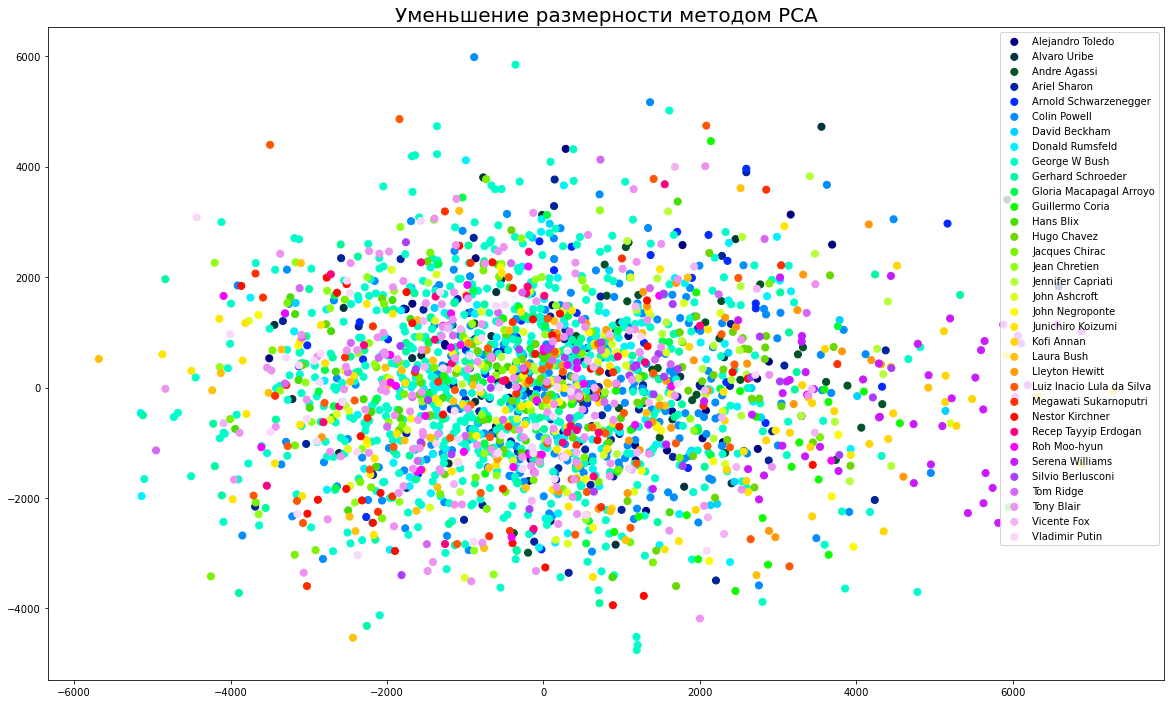

In [43]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(34): # перебираем цифру
    norm = Normalize(vmin=0, vmax=34) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                c=[color] * len(X_pca_2[:, 0][y == d]), label=names[d], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

In [44]:
svd = TruncatedSVD(n_components=2)

X_svd_2 = svd.fit_transform(X)
X_svd_2

array([[12080.787  ,  1621.185  ],
       [12342.293  ,  1150.7605 ],
       [16473.543  , -2708.7083 ],
       ...,
       [14159.399  ,   451.71094],
       [14201.54   ,  3114.8088 ],
       [15491.477  ,  -606.78674]], dtype=float32)

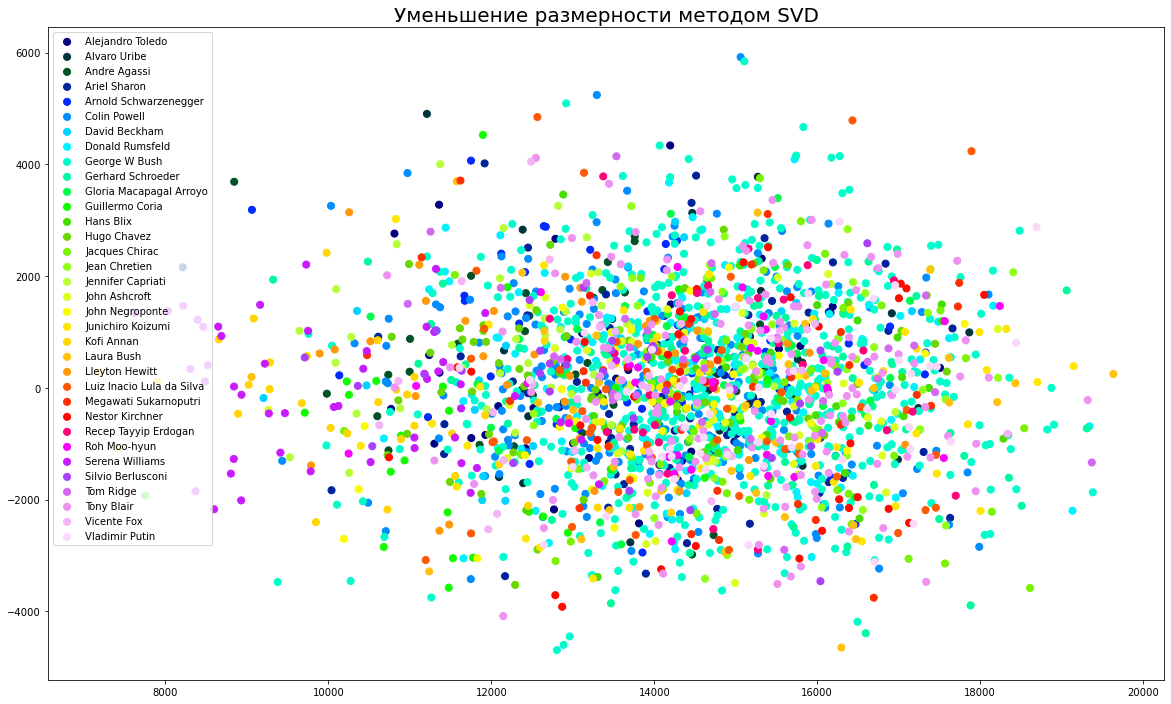

In [45]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(34): # перебираем цифру
    norm = Normalize(vmin=0, vmax=34) # для красивых цветов
    
    
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_svd_2[:, 0][y == d],
                X_svd_2[:, 1][y == d],
                c=[color] * len(X_svd_2[:, 0][y == d]), label=names[d], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом SVD", fontsize=20)
plt.legend()

In [46]:
pre_lda_score = []
lda_qr_score = []
PCA_score = []
SVD_score = []

In [47]:
for i in range(1,X_l.shape[1]+1):
    pre_lda_score.append(cross_val_score(LogisticRegression(),X_l[:,:i], y, scoring='accuracy').mean())
    lda_qr_score.append(cross_val_score(LogisticRegression(),X_l_full[:,:i], y, scoring='accuracy').mean())
    
    pca = PCA(n_components=i)
    X_pca = pca.fit(X).transform(X)
    PCA_score.append(cross_val_score(LogisticRegression(),X_pca, y, scoring='accuracy').mean())
    
    svd = TruncatedSVD(n_components=i)
    X_svd = svd.fit_transform(X)
    SVD_score.append(cross_val_score(LogisticRegression(),X_svd, y, scoring='accuracy').mean())

In [48]:
const = cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()
const = [const]*X_l.shape[1]

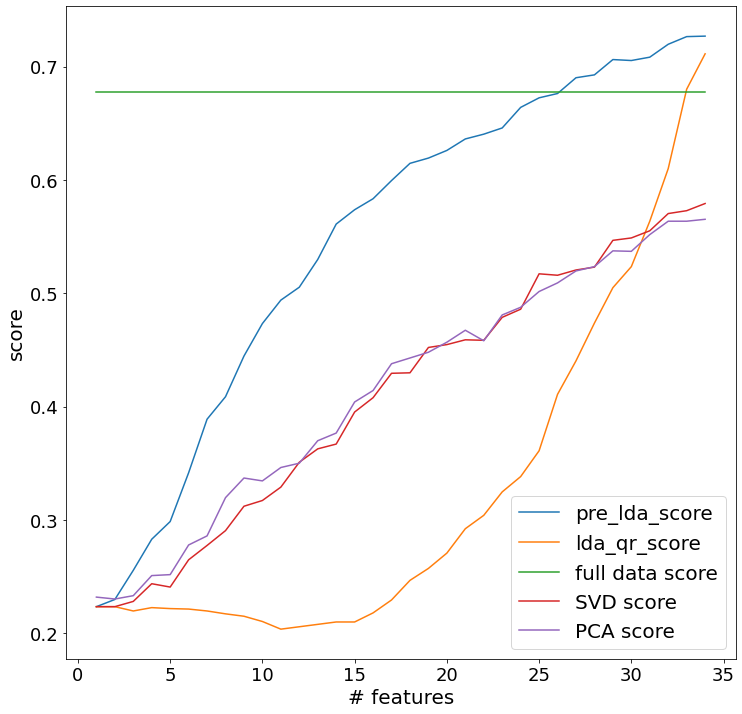

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 12))


plt.plot(np.arange(1,35), pre_lda_score, label="pre_lda_score")
plt.plot(np.arange(1,35), lda_qr_score, label="lda_qr_score")
plt.plot(np.arange(1,35), const, label="full data score")
plt.plot(np.arange(1,35), SVD_score, label="SVD score")
plt.plot(np.arange(1,35), PCA_score, label="PCA score")

plt.legend(fontsize=20)
plt.xlabel("# features", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

plt.show()

In [50]:
pre_lda_time = []
lda_qr_time = []
PCA_time = []
SVD_time = []

In [51]:
clf = LogisticRegression()
for i in range(1,X_l.shape[1]+1):
    t =  %timeit -o -q -r 1 clf.fit(X_l[:,:i], y)
    pre_lda_time.append(t.best)

In [52]:
for i in range(1,X_l.shape[1]+1):
    t =  %timeit -o -q -r 1 clf.fit(X_l_full[:,:i], y)
    lda_qr_time.append(t.best)

In [53]:
clf = LogisticRegression()
t =  %timeit -o -q -r 1 clf.fit(X, y)
const = [t.best]*X_l.shape[1]

In [54]:
for i in range(1,X_l.shape[1]+1):
    pca = PCA(n_components=i)
    X_pca = pca.fit(X).transform(X)
    
    t =  %timeit -o -q -r 1 clf.fit(X_pca, y)
    PCA_time.append(t.best)

In [55]:
for i in range(1,X_l.shape[1]+1):
    svd = TruncatedSVD(n_components=i)
    X_svd = svd.fit_transform(X)
    
    t =  %timeit -o -q -r 1 clf.fit(X_svd, y)
    SVD_time.append(t.best)

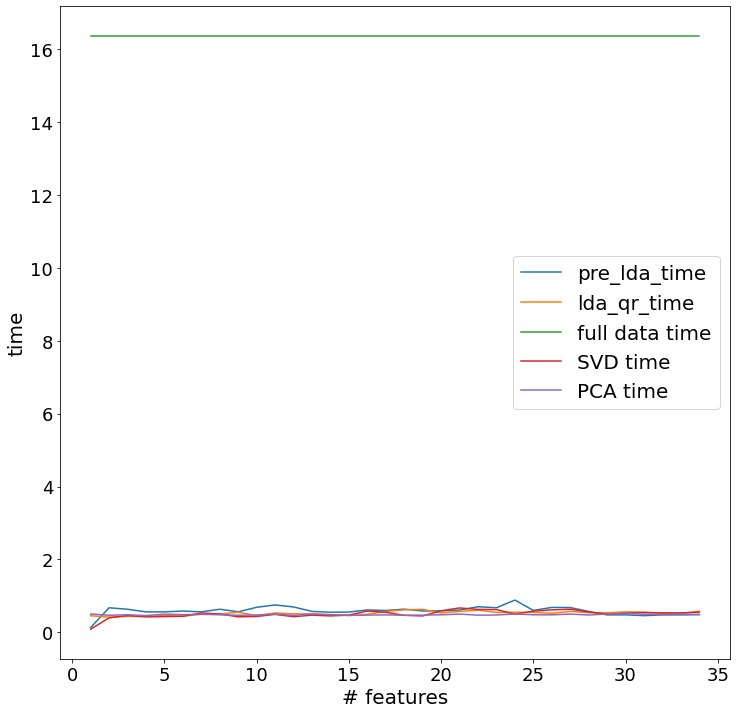

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 12))


plt.plot(np.arange(1,35), pre_lda_time, label="pre_lda_time")
plt.plot(np.arange(1,35), lda_qr_time, label="lda_qr_time")
plt.plot(np.arange(1,35), const, label="full data time")
plt.plot(np.arange(1,35), SVD_time, label="SVD time")
plt.plot(np.arange(1,35), PCA_time, label="PCA time")

plt.legend(fontsize=20)
plt.xlabel("# features", fontsize=20)
plt.ylabel("time", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

plt.show()